# **Домашнее задание 5**

Линейная регрессия и метод наименьших квадратов

b0=0.998, b1=49.933 задание 1
Интервал для прогноза: 19.483
95% вероятность того, что истинное значение находится между 176.016 and 214.982
истинное значение : 182.213


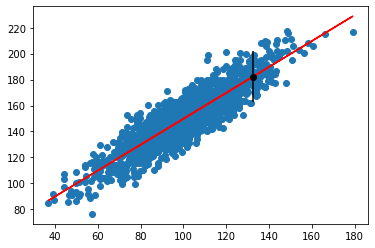

In [1]:
# linear regression prediction with prediction interval
from numpy.random import randn
from numpy.random import seed
from numpy import power
from numpy import sqrt
from numpy import mean
from numpy import std
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot
# генератор случайных чисел
seed(1)
# подготавливаем данные 
x = 20 * randn(1500) + 100
y = x + (10 * randn(1500) + 50)
# Создали полходящую зависимость для линейной регрессии 
b1, b0, r_value, p_value, std_err = linregress(x, y)
print('b0=%.3f, b1=%.3f задание 1' % (b1, b0))      # ОТВЕТ НА ЗАДАНИЕ в 1 вычислить
# делаем предсказания 
yhat = b0 + b1 * x
# определяем новый ввод, ожидаемое значение и прогноз ибо хочу потом предсказывать 
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]
# оцениваем stdev от yhat
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# рассчитаем интервал для прогнозирования
interval = 1.96 * stdev
print('Интервал для прогноза: %.3f' % interval)
lower, upper = y_out - interval, y_out + interval
print('95%% вероятность того, что истинное значение находится между %.3f and %.3f' % (lower, upper))
print('истинное значение : %.3f' % yhat_out)
# выведем выборку и прогноз и интервальный участок ! 
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='red')
pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
pyplot.show()

Сделали для превдорондомной модели, теперь сделаем тоже самое только на реальных данных. И создадим функцию для проврки. ![задание 5.2](https://a.radikal.ru/a34/1912/ae/f1a88548b34a.png)

In [0]:
import statistics
import numpy as np
def rxy(masx,masy):
  xmean = np.mean(masx)
  print('xmean', xmean)
  ymean = np.mean(masy)
  print('ymean', ymean)
  covXY = 0 
  for i in range(len(masx)):
    print((masx[i]-xmean)*(masy[i]-ymean))
    covXY+= (masx[i]-xmean)*(masy[i]-ymean)
  print('covXY', covXY)
  Dmasx = statistics.variance(masx)
  print('Dmasx', Dmasx)
  Dmasy = statistics.variance(masy)
  print('Dmasy', Dmasy)
  return covXY/((Dmasx*Dmasy)**(0.5))



Для начала воспользуемся стандартными. Подручными средствами так сказать и посмотрим из библиотеки склерн 

In [0]:
from sklearn.datasets import load_boston
import seaborn as sns
import pandas as pd
boston = load_boston()
print(boston.DESCR)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Теперь выборка.  Возьмем из уже загруженных иногда, так как мне лень, я буду использовать "разведывательный анализ" 

Изучим карту корреляций разглядывая график. Визуализируем матрицу корреляций ввиде тепловой карты:

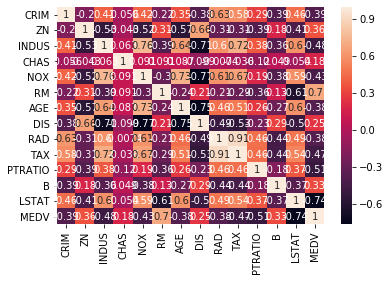

In [0]:
hm = sns.heatmap(boston_df.corr(), cbar=True, annot=True) # видно черные и бежевые цвета круто !!! =P

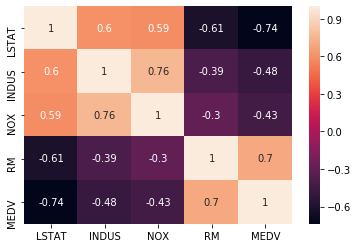

In [0]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
hm = sns.heatmap(boston_df[cols].corr(), cbar=True, annot=True)

Спасибо за онлайн курс! 

Как зависит нижний уровень населеиня от средней стоимости на квартиры в Дании в 1980 года 


Я выбираю x з

In [0]:
x = []
y = []

for i in range(len(boston_df[['LSTAT']].values.tolist())):
  x.append(boston_df[['LSTAT']].values.tolist()[i][0])
for i in range(len(boston_df['MEDV'].values.tolist())):
  y.append(boston_df['MEDV'].values.tolist()[i])



x = np.array(x)

y =  np.array(y)

Коэффициент корреляции Пирсона  -0.7376627261740145


А теперь посчитаем предложенный вами коэффициент корреляции Пирсона как вы просили.

In [0]:
import itertools 

def pearsonr(x, y):
  # Assume len(x) == len(y)
  n = len(x)
  sum_x = float(sum(x))
  sum_y = float(sum(y))
  sum_x_sq = sum(map(lambda x: pow(x, 2), x))
  sum_y_sq = sum(map(lambda x: pow(x, 2), y))
  psum = sum(map(lambda x, y: x * y, x, y))
  num = psum - (sum_x * sum_y/n)
  den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
  if den == 0: return 0
  return num / den

In [0]:
pearsonr(x,y)

-0.73766272617403

Мы видим, что он отрицательный, что не страшно, это значит что график будет направлен вниз. И надо брать по модулю $|r_{xy}| \geq 0.7$, моя система строит для любых выборок(главное подавать nparray). И у нас вышло что полученный $|r_{xy}| \geq $ 0.7

Он уже совпал с графиком, что уже хорошо! Но он медленный, хочу добавить производительности. 

Вариант расчета 2

In [0]:
import statistics
import numpy as np
def rxy(masx,masy):
  xmean = np.mean(masx)
  ymean = np.mean(masy)
  covXY = 0
  Dsx = 0
  Dsy = 0
  for i in range(len(masx)):
    covXY+= ((masx[i]-xmean)*(masy[i]-ymean))
    Dsx+= (masx[i]-xmean)**2
    Dsy+= (masy[i]-ymean)**2
  Dmasx = np.var(masx)
  Dmasy = np.var(masy)
  return covXY/(Dsx*Dsy)**(0.5)

print('Коэффициент корреляции Пирсона ', rxy(x, y))

Коэффициент корреляции Пирсона  -0.7376627261740145


In [0]:
# print(x)
# print(y)

# **Построение графика!** 

b0=-0.950, b1=34.554 задание 1
Интервал для прогноза: 12.183
95% вероятность того, что истинное значение находится между 11.817 and 36.183
истинное значение : 29.823


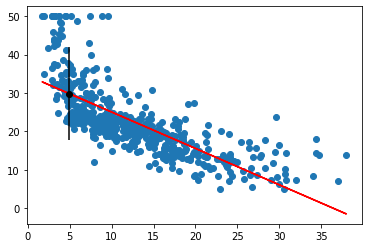

In [0]:
# linear regression prediction with prediction interval
from numpy.random import randn
from numpy.random import seed
from numpy import power
from numpy import sqrt
from numpy import mean
from numpy import std
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot


# Создали полходящую зависимость для линейной регрессии 
b1, b0, r_value, p_value, std_err = linregress(x, y)
print('b0=%.3f, b1=%.3f задание 1' % (b1, b0))      # ОТВЕТ НА ЗАДАНИЕ в 1 вычислить
# делаем предсказания 
yhat = b0 + b1 * x
# определяем новый ввод, ожидаемое значение и прогноз ибо хочу потом предсказывать 
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]
# оцениваем stdev от yhat
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# рассчитаем интервал для прогнозирования
interval = 1.96 * stdev
print('Интервал для прогноза: %.3f' % interval)
lower, upper = y_out - interval, y_out + interval
print('95%% вероятность того, что истинное значение находится между %.3f and %.3f' % (lower, upper))
print('истинное значение : %.3f' % yhat_out)
# выведем выборку и прогноз и интервальный участок ! 
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='red')
pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
pyplot.show()



---



# Проверим еще данные! 

Загрузим данные из kaggle [afrika](https://www.kaggle.com/chirin/africa-economic-banking-and-systemic-crisis-data)

In [0]:
import requests
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
f=open(r'fin.csv',"wb") 
ufr = requests.get("https://drive.google.com/uc?authuser=0&id=19936w7s_BDQh0KXZmvlCQId_tgOMnQOT&export=download") 
f.write(ufr.content) 
f.close()
df = pd.read_csv(r"fin.csv")

In [0]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


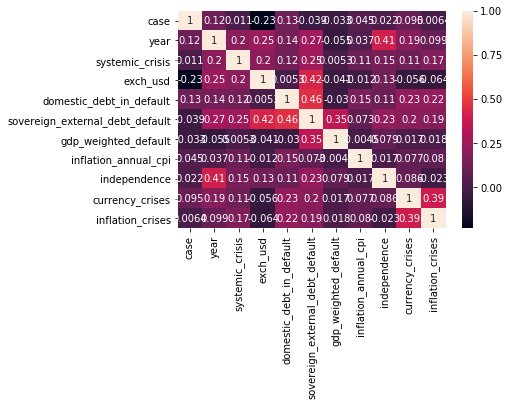

In [0]:
hm = sns.heatmap(df.corr(), cbar=True, annot=True) 

Видим, что нет зависимых данных в этом файле. 



---



Теперь проанализируем население!  Данные взяты с [сайт](https://datahub.io/core/population#data) 

In [0]:
import requests
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
f=open(r'population_csv.csv',"wb") 
ufr = requests.get("https://drive.google.com/uc?authuser=0&id=1SJtYLLpQTvtvCz_5GsH5QJSExyNmBT6R&export=download") 
f.write(ufr.content) 
f.close()
df = pd.read_csv(r"population_csv.csv")
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92490932.0
1,Arab World,ARB,1961,95044497.0
2,Arab World,ARB,1962,97682294.0
3,Arab World,ARB,1963,100411076.0
4,Arab World,ARB,1964,103239902.0
...,...,...,...,...
14880,Zimbabwe,ZWE,2012,14710826.0
14881,Zimbabwe,ZWE,2013,15054506.0
14882,Zimbabwe,ZWE,2014,15411675.0
14883,Zimbabwe,ZWE,2015,15777451.0


In [0]:
df.head(100)

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92490932.0
1,Arab World,ARB,1961,95044497.0
2,Arab World,ARB,1962,97682294.0
3,Arab World,ARB,1963,100411076.0
4,Arab World,ARB,1964,103239902.0
...,...,...,...,...
95,Caribbean small states,CSS,1998,6438587.0
96,Caribbean small states,CSS,1999,6484510.0
97,Caribbean small states,CSS,2000,6530691.0
98,Caribbean small states,CSS,2001,6577216.0


Так подключили, теперь посмотрим на корреляцию. население страны от времени.

Подготовка данных для вывода отношений 

In [0]:
data = pd.pivot_table(df, values='Value', 
                     index=['Country Name'], 
                     columns='Year')

In [0]:
data

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,1.015233e+07,1.037263e+07,1.060435e+07,1.085443e+07,1.112612e+07,1.141782e+07,1.172194e+07,1.202782e+07,1.232154e+07,1.259029e+07,1.284030e+07,1.306754e+07,1.323773e+07,1.330670e+07,1.324837e+07,1.305395e+07,1.274964e+07,1.238927e+07,1.204712e+07,1.178305e+07,1.160104e+07,1.150276e+07,1.154089e+07,1.177761e+07,1.224911e+07,1.299366e+07,1.398123e+07,1.509510e+07,1.617272e+07,1.709954e+07,1.782288e+07,1.838160e+07,1.886400e+07,1.940368e+07,2.009376e+07,2.096646e+07,2.197992e+07,2.306485e+07,2.411898e+07,2.507080e+07,2.589345e+07,2.661679e+07,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07
Albania,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,1.914573e+06,1.965598e+06,2.022272e+06,2.081695e+06,2.135479e+06,2.187853e+06,2.243126e+06,2.296752e+06,2.350124e+06,2.404831e+06,2.458526e+06,2.513546e+06,2.566266e+06,2.617832e+06,2.671997e+06,2.726056e+06,2.784278e+06,2.843960e+06,2.904429e+06,2.964762e+06,3.022635e+06,3.083605e+06,3.142336e+06,3.227943e+06,3.286542e+06,3.266790e+06,3.247039e+06,3.227287e+06,3.207536e+06,3.187784e+06,3.168033e+06,3.148281e+06,3.128530e+06,3.108778e+06,3.089027e+06,3.060173e+06,3.051010e+06,3.039616e+06,3.026939e+06,3.011487e+06,2.992547e+06,2.970017e+06,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06
Algeria,1.112489e+07,1.140486e+07,1.169015e+07,1.198514e+07,1.229597e+07,1.262695e+07,1.298027e+07,1.335420e+07,1.374439e+07,1.414444e+07,1.455003e+07,1.496011e+07,1.537709e+07,1.580443e+07,1.624711e+07,1.670910e+07,1.719024e+07,1.769018e+07,1.821233e+07,1.876076e+07,1.933772e+07,1.994366e+07,2.057570e+07,2.122829e+07,2.189385e+07,2.256590e+07,2.324127e+07,2.391790e+07,2.459149e+07,2.525767e+07,2.591237e+07,2.655433e+07,2.718109e+07,2.778626e+07,2.836225e+07,2.890430e+07,2.941142e+07,2.988684e+07,3.033573e+07,3.076561e+07,3.118366e+07,3.159215e+07,3.199505e+07,3.240351e+07,3.283110e+07,3.328844e+07,3.377792e+07,3.430008e+07,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07,4.060605e+07
American Samoa,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,2.432100e+04,2.511600e+04,2.588500e+04,2.661400e+04,2.729200e+04,2.791600e+04,2.849200e+04,2.901400e+04,2.948800e+04,2.993200e+04,3.032100e+04,3.068900e+04,3.110200e+04,3.167300e+04,3.245700e+04,3.349300e+04,3.473800e+04,3.616000e+04,3.768800e+04,3.924100e+04,4.083700e+04,4.245000e+04,4.404700e+04,4.559300e+04,4.703800e+04,4.837500e+04,4.959300e+04,5.072000e+04,5.180300e+04,5.286800e+04,5.392900e+04,5.494100e+04,5.590100e+04,5.677000e+04,5.752100e+04,5.817500e+04,5.873100e+04,5.911700e+04,5.926400e+04,5.911800e+04,5.865000e+04,5.790300e+04,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04
Andorra,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,1.964700e+04,2.075800e+04,2.189000e+04,2.305800e+04,2.427600e+04,2.555900e+04,2.689200e+04,2.823200e+04,2.952000e+04,3.070500e+04,3.177700e+04,3.277100e+04,3.373700e+04,3.481800e+04,3.606700e+04,3.750000e+04,3.911400e+04,4.086700e+04,4.270600e+04,4.460000e+04,4.651700e+04,4.845500e+04,5.043400e+04,5.244800e+04,5.450900e+04,5.667100e+04,5.888800e+04,6.097100e+04,6.267700e+04,6.385000e+04,6.436000e+04,6.432700e+04,6.414200e+04,6.437000e+04,6.539000e+04,6.734100e+04,7.004900e+04,7.318200e+04,7.624400e+04,7.886700e+04,8.099100e+04,8.268300e+04,8

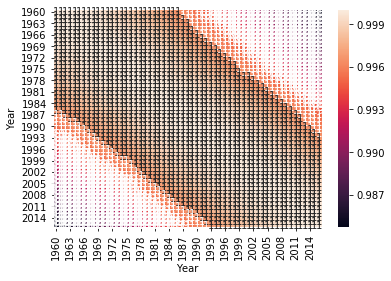

In [0]:
hm = sns.heatmap(data.corr(), cbar=True, annot=True) 



Ладно проанализируем население Японии. 

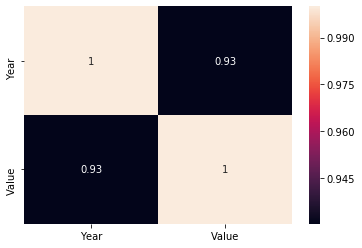

In [0]:
import matplotlib.pyplot as plt
ax = sns.heatmap(df[df['Country Name']=='Japan'].corr(), cbar=True, annot=True) 


In [0]:
x = df['Year'].unique()
y = df[df['Country Name']=='Japan']['Value'].tolist()




x = np.array(x)

y =  np.array(y)

b0=622798.502, b1=-1120420087.592 задание 1
Интервал для прогноза: 8063961.956
95% вероятность того, что истинное значение находится между 84436610.044 and 100564533.956
истинное значение : 100264976.728


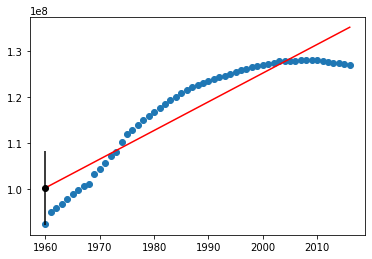

In [0]:
# linear regression prediction with prediction interval
from numpy.random import randn
from numpy.random import seed
from numpy import power
from numpy import sqrt
from numpy import mean
from numpy import std
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot


# Создали полходящую зависимость для линейной регрессии 
b1, b0, r_value, p_value, std_err = linregress(x, y)
print('b0=%.3f, b1=%.3f задание 1' % (b1, b0))      # ОТВЕТ НА ЗАДАНИЕ в 1 вычислить
# делаем предсказания 
yhat = b0 + b1 * x
# определяем новый ввод, ожидаемое значение и прогноз ибо хочу потом предсказывать 
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]
# оцениваем stdev от yhat
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# рассчитаем интервал для прогнозирования
interval = 1.96 * stdev
print('Интервал для прогноза: %.3f' % interval)
lower, upper = y_out - interval, y_out + interval
print('95%% вероятность того, что истинное значение находится между %.3f and %.3f' % (lower, upper))
print('истинное значение : %.3f' % yhat_out)
# выведем выборку и прогноз и интервальный участок ! 
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='red')
pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
pyplot.show()